In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import motiflets.motiflets as mtfls
import motiflets.plotting as mtfls_plt
from tests.audio.lyrics import *
import motiflets_uni.motiflets as mtfls_uni
from motiflets_uni.plotting import Motiflets as Motiflets_uni
from sklearn.decomposition import PCA
import tests.amc.amc_parser as amc_parser
import time

/home/niyaz/Programme/miniconda3/envs/ubuntu-motiflets-mv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
k_max = 16
motif_length = 100
n_dims_rest = 25
n_dims_rest2 = 17

def get_joint_pos_dict(c_joints, c_motion):
    c_joints['root'].set_motion(c_motion)
    out_dict = {}
    for k1, v1 in c_joints['root'].to_dict().items():
        for k2, v2 in zip('xyz', v1.coordinate[:, 0]):
            out_dict['{}_{}'.format(k1, k2)] = v2
    return out_dict


def exclude_body_joints(df):
    # Filter body joints as suggested by Yeh
    exclude = ['root', 'lowerback', 'upperback',
               'thorax', 'lowerneck', 'upperneck', 'head']
    exclude_bones = []
    exclude_bones.extend([x + "_" + k for x in exclude for k in 'xyz'])
    exclude_bones

    return df[~df.index.isin(exclude_bones)]


def include_joints(df, include, add_xyz=True):
    include_bones = []

    if add_xyz:
        include_bones.extend([x + "_" + k for x in include for k in 'xyz'])
    else:
        include_bones = include

    return df[df.index.isin(include_bones)]

amc_name = "13_17" #"Boxing Motions"
asf_path = "datasets/motion_data/13.asf"
amc_path = 'datasets/motion_data/' + amc_name + '.amc'

joints_to_use = ['rclavicle', 'rhumerus', 'rradius', 'rwrist',
             'rhand', 'rfingers', 'rthumb',
             'rfemur', 'rtibia', 'rfoot', 'rtoes']
add_xyz=True

joints = amc_parser.parse_asf(asf_path)
motions = amc_parser.parse_amc(amc_path)

df = pd.DataFrame([get_joint_pos_dict(joints, c_motion) for c_motion in motions]).T
#df = exclude_body_joints(df)
print(df)
#df = include_joints(df, joints_to_use, add_xyz=add_xyz)
#print(df)
# print("Used joints:", joints_to_use)
# series = df.values
# print(f'DatensatzLänge: {series.shape[1]}')
# print(series.shape)


                  0          1          2          3          4          5     \
root_x        4.101890   4.113940   4.127430   4.144050   4.162250   4.184910   
root_y       17.518100  17.511900  17.508500  17.511000  17.523500  17.545900   
root_z       -3.866450  -3.837700  -3.807390  -3.776730  -3.745170  -3.713820   
lhipjoint_x   5.076812   5.078488   5.081993   5.091242   5.100829   5.108174   
lhipjoint_y  15.723790  15.721240  15.722408  15.728400  15.745231  15.768951   
...                ...        ...        ...        ...        ...        ...   
rfingers_y   19.180022  19.151890  19.157544  19.143299  19.170816  19.227377   
rfingers_z   -0.898867  -0.871628  -0.826570  -0.789275  -0.736242  -0.675225   
rthumb_x     -1.511833  -1.539144  -1.557586  -1.567575  -1.575803  -1.588518   
rthumb_y     18.997490  18.966512  18.970557  18.957488  18.987696  19.048148   
rthumb_z     -1.035693  -1.010968  -0.968368  -0.935545  -0.886563  -0.828951   

                  6        

In [3]:
print(df.shape[0])

93


In [5]:
test_k = 15

n_dim_list = [x for x in range(2, df.shape[0])]
times_list = [None, None]

for i, n_dim in enumerate(n_dim_list):
    print(f'{i}/{len(n_dim_list)}')
    start = time.time()
    mtfls.runtime_test(test_k, df, motif_length, n_dims=n_dim)
    end = time.time()
    times_list.append(end-start)
    

0/91
1/91
2/91
3/91
4/91
5/91
6/91
7/91
8/91
9/91
10/91
11/91
12/91
13/91
14/91
15/91
16/91
17/91
18/91
19/91
20/91
21/91
22/91
23/91
24/91
25/91
26/91
27/91
28/91
29/91
30/91
31/91
32/91
33/91
34/91
35/91
36/91
37/91
38/91
39/91
40/91
41/91
42/91
43/91
44/91
45/91
46/91
47/91
48/91
49/91
50/91
51/91
52/91
53/91
54/91
55/91
56/91
57/91
58/91
59/91
60/91
61/91
62/91
63/91
64/91
65/91
66/91
67/91
68/91
69/91
70/91
71/91
72/91
73/91
74/91
75/91
76/91
77/91
78/91
79/91
80/91
81/91
82/91
83/91
84/91
85/91
86/91
87/91
88/91
89/91
90/91


In [6]:
print(times_list)

[None, None, 18.58044672012329, 17.319352626800537, 18.12584352493286, 17.652358293533325, 18.33409810066223, 18.093205213546753, 17.85378098487854, 18.10071849822998, 17.76485824584961, 17.501570224761963, 17.710663318634033, 17.51218318939209, 17.946197748184204, 18.482645273208618, 17.131367683410645, 18.1711483001709, 18.328105211257935, 18.246273279190063, 17.26751685142517, 17.708399057388306, 17.679755449295044, 18.138434648513794, 18.14957571029663, 18.145684719085693, 18.17491054534912, 17.713061094284058, 18.063408851623535, 17.90094804763794, 17.42418670654297, 17.82624316215515, 18.855775117874146, 17.65050482749939, 17.432053565979004, 18.19572925567627, 18.05781602859497, 17.12021541595459, 18.09351348876953, 18.099364280700684, 18.430017232894897, 17.37738299369812, 17.358474493026733, 17.64693021774292, 18.23777461051941, 17.609872102737427, 18.5895094871521, 19.036500930786133, 20.000336170196533, 18.204519748687744, 17.97829580307007, 18.769225358963013, 18.7180814743

/tmp/ipykernel_30472/1316556741.py:1: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


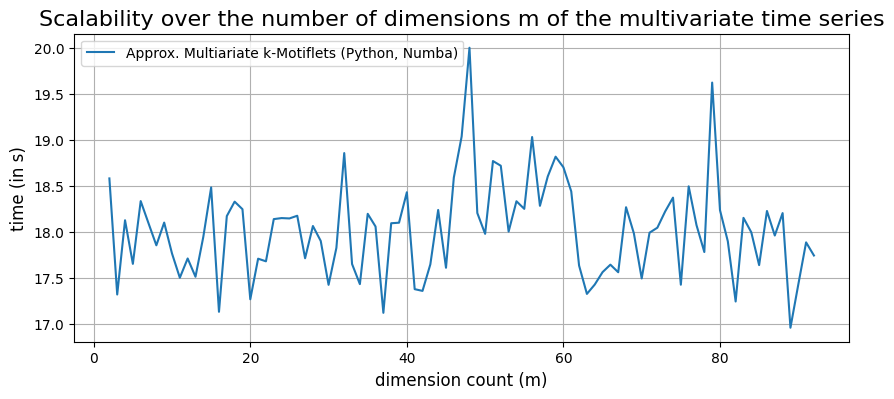

In [3]:
from scipy.ndimage.filters import gaussian_filter1d

plt.figure(figsize=(10,4))
n_dim_list = [x for x in range(2, df.shape[0])]

n_dim_list.insert(0, 0)
n_dim_list.insert(0, 1)

#times_list[2] = times_list[4]+1

times_list = [None, None, 18.58044672012329, 17.319352626800537, 18.12584352493286, 17.652358293533325, 18.33409810066223, 18.093205213546753, 17.85378098487854, 18.10071849822998, 17.76485824584961, 17.501570224761963, 17.710663318634033, 17.51218318939209, 17.946197748184204, 18.482645273208618, 17.131367683410645, 18.1711483001709, 18.328105211257935, 18.246273279190063, 17.26751685142517, 17.708399057388306, 17.679755449295044, 18.138434648513794, 18.14957571029663, 18.145684719085693, 18.17491054534912, 17.713061094284058, 18.063408851623535, 17.90094804763794, 17.42418670654297, 17.82624316215515, 18.855775117874146, 17.65050482749939, 17.432053565979004, 18.19572925567627, 18.05781602859497, 17.12021541595459, 18.09351348876953, 18.099364280700684, 18.430017232894897, 17.37738299369812, 17.358474493026733, 17.64693021774292, 18.23777461051941, 17.609872102737427, 18.5895094871521, 19.036500930786133, 20.000336170196533, 18.204519748687744, 17.97829580307007, 18.769225358963013, 18.7180814743042, 18.002903938293457, 18.332388401031494, 18.249776601791382, 19.03019142150879, 18.282569408416748, 18.60175633430481, 18.81668448448181, 18.701417207717896, 18.439482927322388, 17.633978843688965, 17.325842142105103, 17.42725706100464, 17.562421560287476, 17.643449306488037, 17.56108784675598, 18.26766300201416, 17.983641624450684, 17.493500232696533, 17.99079656600952, 18.045024394989014, 18.222069263458252, 18.371840953826904, 17.42562246322632, 18.494459629058838, 18.073055267333984, 17.780949354171753, 19.621651649475098, 18.235607624053955, 17.897762537002563, 17.243276834487915, 18.152106761932373, 17.995084285736084, 17.638484954833984, 18.22677731513977, 17.96020793914795, 18.203802347183228, 16.95844602584839, 17.42619752883911, 17.885642528533936, 17.743173599243164]

ysmoothed = gaussian_filter1d(times_list[2:], sigma=2)

ysmoothed = [None, None, *ysmoothed]

plt.plot(n_dim_list, times_list, label="Approx. Multiariate k-Motiflets (Python, Numba)")
plt.title("Scalability over the number of dimensions m of the multivariate time series", fontsize=16)
plt.ylabel('time (in s)', fontsize=12)
plt.xlabel('dimension count (m)', fontsize=12)
plt.legend()
plt.grid()
plt.savefig("../../Latex/BachelorarbeitFinal/Images/scale_m/scale.pdf", bbox_inches='tight', dpi=600)

plt.show()

In [ ]:
print(times_list)

[None, None, 23.484180212020874, 18.42488694190979, 18.441287994384766, 18.850258588790894, 18.7195725440979, 18.4177405834198, 18.657766819000244, 18.499926328659058, 18.451964855194092, 18.872151136398315, 18.921918869018555, 19.133508682250977, 19.02835965156555, 19.04279661178589, 19.09626269340515, 19.300928831100464, 18.612435817718506, 18.604102611541748, 18.90117359161377, 19.281413793563843, 19.47433829307556, 19.113102436065674, 19.33765745162964, 19.247002840042114, 19.316657304763794, 19.57852530479431, 19.75762104988098, 19.93763279914856, 19.926852226257324, 20.739880084991455, 19.79685068130493, 20.238428831100464, 20.741029262542725, 20.79596996307373, 20.536550045013428, 20.179800033569336, 20.935757875442505, 20.96058678627014, 20.79396343231201, 20.721343517303467, 21.538682460784912, 20.69743013381958, 20.854619026184082, 21.354477405548096, 20.961784839630127, 20.95514941215515, 21.276100873947144, 21.415225982666016, 21.817347764968872, 22.70864725112915, 21.78536